<a href="https://colab.research.google.com/github/code-with-shannu/Pytorch/blob/main/Auto_labelling_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import locale
# Set the locale to UTF-8
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
print(locale.getpreferredencoding())
# Now try your commands again
!sudo locale-gen en_US.UTF-8 # Generate the locale if it doesn't exist, using sudo for privileges
!sudo update-locale LC_ALL=en_US.UTF-8 LANG=en_US.UTF-8 # Update locale, using sudo for privileges
!git clone https://github.com/code-with-shannu/Computer-Vision.git

ANSI_X3.4-1968


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [1]:
!nvidia-smi

Mon Jul  1 17:57:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
pip install autodistill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 9.0 MB/s eta 0:00:00


Installing autodsitill Package on the colab

In [3]:

!pip install -q \
autodistill \
autodistill-grounded-sam \
autodistill-yolov8 \
roboflow \
supervision==0.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.0/527.0 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.2/300.2 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 93.4 MB/s eta 0:00:00


In [4]:
import os
home = os.getcwd()
print(home)

/content


In [15]:
!mkdir {home}/images

In [14]:
import roboflow

roboflow.login(force=True)

dataset = roboflow.download_dataset(dataset_url="https://universe.roboflow.com/datatrainvhplate/tripc_add_pl/dataset/1", model_format = "yolov9")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov9 in progress : 85.0%
Version export complete for yolov9 format



Extracting Dataset Version Zip to tripc_add_pl-1 in yolov9:: 100%|██████████| 595/595 [00:00<00:00, 2591.03it/s]


In [17]:
%mv {home}/tripc_add_pl-1/train/images/* {home}/images

In [18]:
%pwd

'/content'

In [19]:
from autodistill.detection import CaptionOntology

ontology=CaptionOntology({
    "traffic lights": "traffic sign",
    "traffic signs": "traffic sign"
})

In [22]:
DATASET_DIR_PATH = f"{home}/dataset"

In [23]:
IMAGE_DIR_PATH = f"{home}/images/"

In [24]:

from autodistill_grounded_sam import GroundedSAM

base_model = GroundedSAM(ontology=ontology)
dataset = base_model.label(
    input_folder=IMAGE_DIR_PATH,
    extension=".jpg",
    output_folder=DATASET_DIR_PATH)

trying to load grounding dino directly
downloading dino model weights


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)


final text_encoder_type: bert-base-uncased



The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Labeling /content/images/img2_6120_png_jpg.rf.30737f0b1d4c7fc053db5a06589232ad.jpg:   0%|          | 0/207 [00:00<?, ?it/s]The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to doc

Labeled dataset created - ready for distillation.


In [25]:
ANNOTATIONS_DIRECTORY_PATH = f"{home}/dataset/train/labels"
IMAGES_DIRECTORY_PATH = f"{home}/dataset/train/images"
DATA_YAML_PATH = f"{home}/dataset/data.yaml"
import supervision as sv
dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMAGES_DIRECTORY_PATH,
    annotations_directory_path=ANNOTATIONS_DIRECTORY_PATH,
    data_yaml_path=DATA_YAML_PATH)
len(dataset)

165

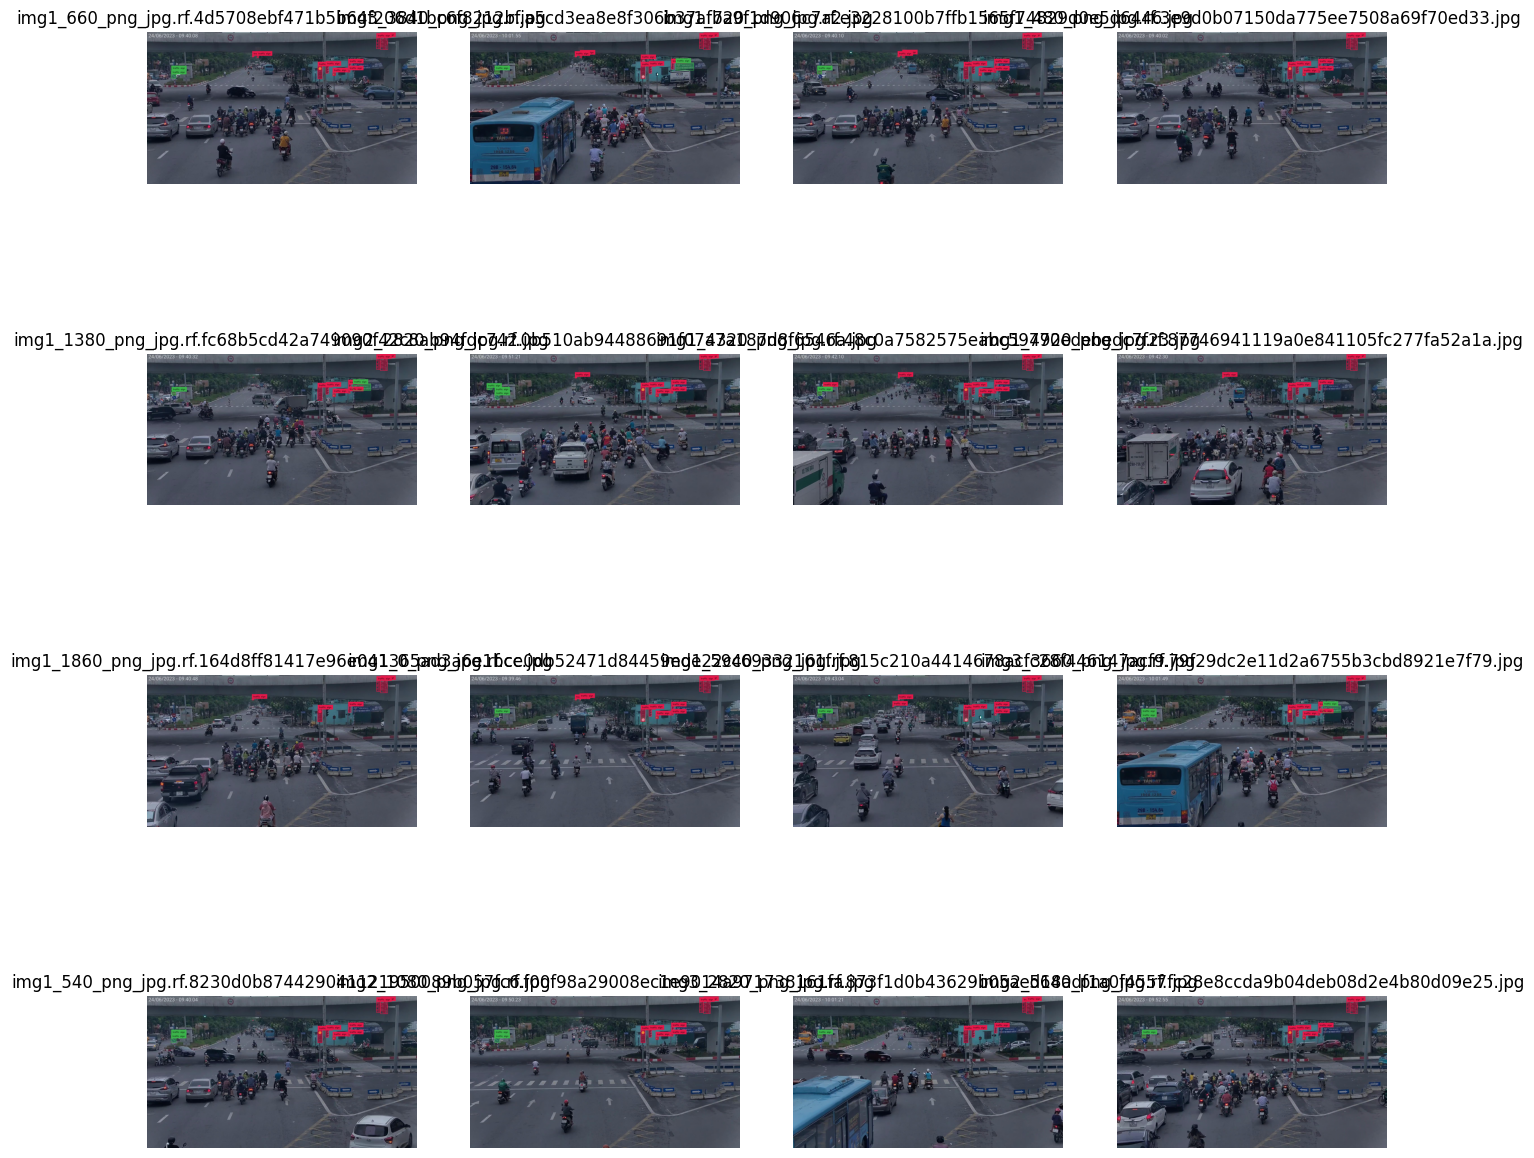

In [26]:
SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 16)


import supervision as sv

image_names = list(dataset.images.keys())[:SAMPLE_SIZE]

mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator()

images = []
for image_name in image_names:
    image = dataset.images[image_name]
    annotations = dataset.annotations[image_name]
    labels = [
        dataset.classes[class_id]
        for class_id
        in annotations.class_id]
    annotates_image = mask_annotator.annotate(
        scene=image.copy(),
        detections=annotations)
    annotates_image = box_annotator.annotate(
        scene=annotates_image,
        detections=annotations,
        labels=labels)
    images.append(annotates_image)

sv.plot_images_grid(
    images=images,
    titles=image_names,
    grid_size=SAMPLE_GRID_SIZE,
    size=SAMPLE_PLOT_SIZE)


In [29]:
# Set the locale to en_US.UTF-8
!apt-get update
!apt-get install locales
!locale-gen en_US.UTF-8
!update-locale LANG=en_US.UTF-8

# Restart runtime if needed (you can do this manually from the Runtime menu)

# Clone the GitHub repository
!git clone https://github.com/code-with-shannu/Computer-Vision.git


NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968